In [1]:
import pandas as pd
import numpy as np 
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:

def disEuclidian(point1, point2):
    return np.sqrt(sum((x - y) ** 2 for x, y in zip(point1, point2)))

def centroidsRand(data, k):
    centroids = random.sample(data, k)
    return centroids

def AsignCentroids(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    
    for point in data:
        distances = [disEuclidian(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
    
    return clusters

def newCentroids(clusters):
    centroids = []
    for cluster in clusters:
        cluster_center = [sum(point[i] for point in cluster) / len(cluster) for i in range(len(cluster[0]))]
        centroids.append(cluster_center)
    return centroids

def covergencia(old_centroids, new_centroids, tol=1e-4):
    return all(disEuclidian(old, new) < tol for old, new in zip(old_centroids, new_centroids))

def k_means(data, k):
    centroids = centroidsRand(data, k)
    converged = False
    
    while not converged:
        clusters = AsignCentroids(data, centroids)
        new_centroids = newCentroids(clusters)
        converged = covergencia(centroids, new_centroids)
        centroids = new_centroids
    
    return centroids, clusters


In [3]:
def plot_clusters(centroids, clusters):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Graficar puntos y centroides
    for i, cluster in enumerate(clusters):
        x, y = zip(*cluster)
        ax1.scatter(x, y, label=f'Cluster {i + 1}')

    centroids_x, centroids_y = zip(*centroids)
    ax1.scatter(centroids_x, centroids_y, color='black', marker='x', s=100, label='Centroides')

    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_title('K-Means Clustering')
    ax1.legend()
    ax1.grid(True)

In [4]:

def plot_clusters_3d(centroids, clusters):
    fig = plt.figure(figsize=(10, 6))
    ax1 = fig.add_subplot(111, projection='3d')

    for i, cluster in enumerate(clusters):
        x, y, z = zip(*cluster)
        ax1.scatter(x, y, z, label=f'Cluster {i + 1}')

    centroids_x, centroids_y, centroids_z = zip(*centroids)
    ax1.scatter(centroids_x, centroids_y, centroids_z, color='black', marker='x', s=100, label='Centroides')

    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('K-Means Clustering in 3D')
    ax1.legend()

    plt.show()

In [5]:
def calculate_inertia(k, clusters, centroids):
    total_inertia = 0
    for i in range(k):
        cluster_points = clusters[i]
        centroid = centroids[i]
        inertia_cluster = sum(disEuclidian(centroid, point) ** 2 for point in cluster_points)
        total_inertia += inertia_cluster
    return total_inertia


In [6]:
def kMeansComplete(Archive, listaCaracteristicas, k): 
    data = pd.read_csv(Archive)
    for columna in listaCaracteristicas:
        data = data[data[columna] != 0]
        
    columnas_seleccionadas = data[listaCaracteristicas]
    data_list = columnas_seleccionadas.values.tolist()
    centroids, clusters = k_means(data_list, k)    
    
    inertia = []
    for k in range(1, len(clusters) + 1):
        total_inertia = calculate_inertia(k, clusters, centroids)
        inertia.append(total_inertia)

    if len(listaCaracteristicas) == 2:
        plot_clusters(centroids, clusters)
    elif len(listaCaracteristicas) == 3:
        plot_clusters_3d(centroids, clusters)
    else: 
        for i, centroid in enumerate(centroids):
            print(f"Centroide {i + 1}: {centroid}")
            print(f"Puntos en el cluster {i + 1}: {clusters[i]}")
        
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(clusters) + 1), inertia, marker='o', linestyle='-', color='b')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Inercia')
    plt.title('Método del Codo para Determinar k')
    plt.grid(True)
    plt.show()

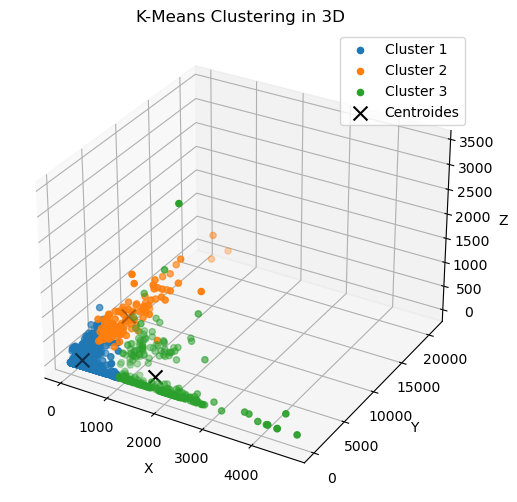

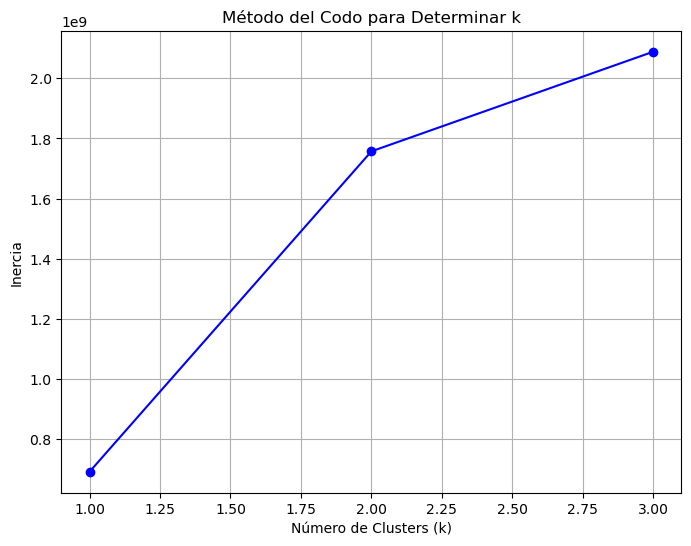

In [7]:
kMeansComplete('Live.csv', ['num_reactions', 'num_comments','num_shares'], 3)